<h1>Data exploring and understanding</h1>

In [1]:
# Importing the neccesary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from scripts.missing_value import percent_missing
import scripts.plot_function as plot
import scripts.fix_outlier as fix
import scripts.multi_variate_plot as cplx_plot

In [2]:
# Reading the data

data = pd.read_csv('../data/Week1_challenge_data_source.csv')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# Exploring the data and finding the columns

pd.set_option('display.max_columns',None)
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [4]:
# Finding number of data points

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns ')

The data has 150001 rows and 55 columns 


<h3>Handling missing values</h3>

In [5]:
# Finding out missing values

percent_missing(data)

The telecom dataset contains 12.5 % missing values.


In [6]:
# Finding out columns with missing values

data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# drop columns with more than 30% missing values

data_clean = data.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
data_clean= data_clean.dropna(how='all')
data_clean.shape

(150001, 45)

In [8]:
# Changing start and end dates to date data type

data_clean['Start']=pd.to_datetime(data_clean['Start'])
data_clean['End']=pd.to_datetime(data_clean['End'])

In [9]:
# Checking the data types of the columns

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       149010 non-null  float64       
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

In [10]:
# Checking to see 10 data samples of the cleaned data

data_clean.sample(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
106232,7.349880e+18,2019-04-27 11:38:00,495.0,2019-04-29 08:18:00,80.0,160781.0,2.082100e+14,3.376173e+10,3.535660e+13,D20295B,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,160781585.0,undefined,undefined,88.0,89.0,2511383.0,10384.0,6594385.0,1573711.0,1453663.0,140896.0,18938568.0,4518825.0,7426459.0,14122730.0,610978370.0,4601754.0,417101685.0,14539385.0,39507685.0,647902828.0
133916,7.349880e+18,2019-04-28 19:55:00,99.0,2019-04-30 05:14:00,55.0,119911.0,2.082020e+14,3.366342e+10,3.554000e+13,D15812A,17.0,1.0,44.0,45.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,32223.0,28150.0,119911956.0,Apple,Apple iPhone 6 (A1586),146.0,141.0,3576978.0,22620.0,3329703.0,421494.0,1245242.0,904155.0,19766350.0,21052503.0,5016139.0,13998102.0,743633580.0,543364.0,736138501.0,10548313.0,47490551.0,776567992.0
17173,1.311450e+19,2019-04-24 19:24:00,493.0,2019-04-25 00:25:00,681.0,18095.0,2.082020e+14,3.366093e+10,3.533180e+13,T50556A,27.0,4.0,23.0,40.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,5505.0,4639.0,18095188.0,Apple,Apple iPhone 6 (A1586),20.0,21.0,1230325.0,58707.0,761750.0,1171267.0,2629716.0,459515.0,22037094.0,8180795.0,16512229.0,4213756.0,35584998.0,2661495.0,561971481.0,12067931.0,28813466.0,78756112.0
117635,7.277830e+18,2019-04-28 02:06:00,588.0,2019-04-29 02:06:00,562.0,86399.0,2.082020e+14,3.366104e+10,8.637690e+13,T93379B,NaN,NaN,14.0,100.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,487.0,529.0,86399974.0,Huawei,Huawei B528S-23A,2.0,2.0,2728631.0,25516.0,4204286.0,2203619.0,2059775.0,93163.0,19352354.0,16401139.0,748973.0,17947119.0,542399726.0,11486297.0,473501551.0,10797355.0,58954208.0,571493745.0
38522,1.304240e+19,2019-04-25 02:55:00,969.0,2019-04-26 13:37:00,337.0,124967.0,2.082020e+14,3.366880e+10,8.637690e+13,L70891B,98.0,52.0,46766.0,9834.0,82.0,5.0,5.0,6.0,98.0,1.0,0.0,0.0,4216252.0,5787545.0,124967368.0,Huawei,Huawei B528S-23A,13873.0,17402.0,1509103.0,32414.0,2323161.0,3666796.0,1553469.0,510298.0,976972.0,14956897.0,19783450.0,5829403.0,601570144.0,9130478.0,235798185.0,4855224.0,38981510.0,627716299.0
22174,1.304240e+19,2019-04-24 20:31:00,753.0,2019-04-25 02:23:00,530.0,21132.0,2.082010e+14,3.360128e+10,3.573570e+13,D70357A,73.0,5.0,149284.0,2504.0,65.0,3.0,3.0,27.0,99.0,0.0,0.0,0.0,5629515.0,2671692.0,21132777.0,Apple,Apple iPhone Xr (A2105),7118.0,10760.0,2829648.0,136.0,6722435.0,1771275.0,3116607.0,714745.0,22259395.0,54072.0,15122233.0,20672949.0,260153674.0,2474193.0,315134147.0,4648670.0,30336040.0,310203992.0
103798,1.304240e+19,2019-04-27 07:24:00,562.0,2019-04-29 07:24:00,553.0,172800.0,2.082020e+14,3.366022e+10,8.637690e+13,T70871C,59.0,31.0,20.0,8.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,502.0,248.0,172800991.0,Huawei,Huawei B528S-23A,4499.0,1.0,3305568.0,44786.0,9692565.0,2337433.0,2347663.0,772985.0,22172867.0,20665543.0,877728.0,21570080.0,141723901.0,2805218.0,747287446.0,1017492.0,49213537.0,180120292.0
122931,7.349880e+18,2019-04-28 05:12:00,630.0,2019-04-29 10:39:00,542.0,106044.0,2.082020e+14,3.362376e+10,3.538480e+13,D79986B,27.0,0.0,23.0,46.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,25557.0,25266.0,106044912.0,Apple,Apple iPhone Se (A1723),118.0,122.0,1706900.0,40587.0,5304138.0,1805440.0,

In [11]:
# Droping rows with missing values

data_clean = data_clean.dropna(subset=['Bearer Id'])
data_clean = data_clean.dropna(subset=['Start'])
data_clean = data_clean.dropna(subset=['End'])
data_clean = data_clean.dropna(subset=['IMSI'])
data_clean = data_clean.dropna(subset=['MSISDN/Number'])

data_clean.shape

(148506, 45)

In [12]:
# Checking the number of Null values in our columns and verify all the missing values are gone

data_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [13]:
# Taking out all the columns that has missing value

missing_value_lists = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)',
'250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']

In [14]:
# Finding out the data types of each missing value containing columns

for value in missing_value_lists:
  print(data_clean[value].dtype,value)

float64 DL TP < 50 Kbps (%)
float64 50 Kbps < DL TP < 250 Kbps (%)
float64 250 Kbps < DL TP < 1 Mbps (%)
float64 DL TP > 1 Mbps (%)
float64 UL TP < 10 Kbps (%)
float64 10 Kbps < UL TP < 50 Kbps (%)
float64 50 Kbps < UL TP < 300 Kbps (%)
float64 UL TP > 300 Kbps (%)
object Last Location Name
float64 Avg RTT DL (ms)
float64 Avg RTT UL (ms)
float64 Nb of sec with Vol DL < 6250B
float64 Nb of sec with Vol UL < 1250B


In [15]:
# Now we saw that all the datatypes are float except the "Last Location Name" column
# We will do fill method mode for the "Last Location Name" 
# We will do fill method mean/median for the other columns

for value in missing_value_lists:
  if(value!="Last Location Name"):
    data_clean[value] = data_clean[value].fillna(data_clean[value].mean())
  else:
    data_clean[value] = data_clean[value].fillna(data_clean[value].mode()[0])

data_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [16]:
# Creating a clean csv file

data_clean.to_csv('../data/clean_telecom_data.csv',index=False)

<AxesSubplot:>

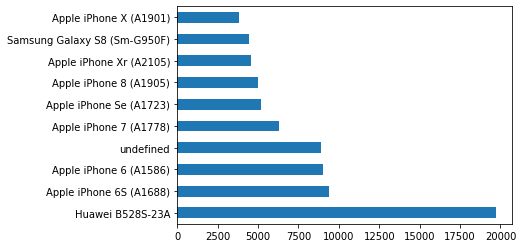

In [17]:
# Finding out the top 10 handset used by customers

data_clean['Handset Type'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

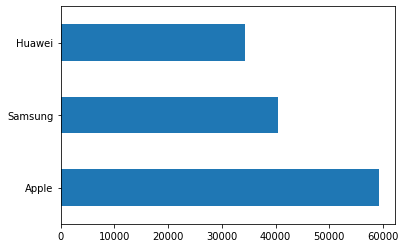

In [18]:
# Finding out the top 3 handset manufacturers

data_clean['Handset Manufacturer'].value_counts()[:3].plot(kind='barh')

#### Finding top 5 handsets per top 3 manufacturers

<AxesSubplot:>

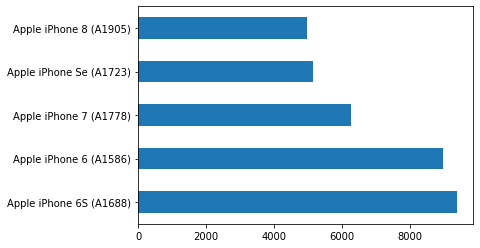

In [19]:
# Finding out top 5 handset for Apple company

handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Apple')['Handset Type'].value_counts()[:5].plot(kind='barh')

<AxesSubplot:>

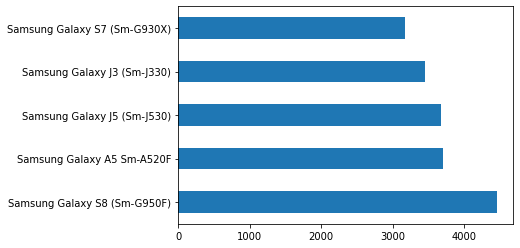

In [20]:
# Finding out top 5 handset for Samsung company

handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Samsung')['Handset Type'].value_counts()[:5].plot(kind='barh')

<AxesSubplot:>

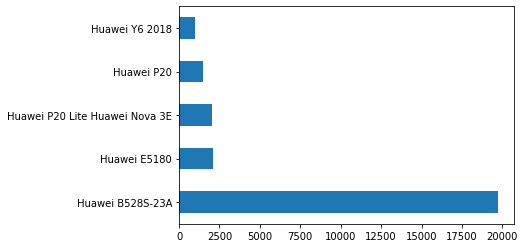

In [21]:
# Finding out top 5 handset for Huawei company

handset_manufacturer_group = data_clean.groupby(['Handset Manufacturer'])
handset_manufacturer_group.get_group('Huawei')['Handset Type'].value_counts()[:5].plot(kind='barh')

## User Overview Ananlysis

In [22]:
# Adding two columns and creating new column and make the float display format to give in 1 decimal place 

pd.set_option('display.float_format', lambda x: '%.1f' % x)

data_clean['Total_UL_and_DL'] = data_clean['Total UL (Bytes)'] + data_clean['Total DL (Bytes)']
data_clean['Other_UL_and_DL'] = data_clean['Other UL (Bytes)'] + data_clean['Other DL (Bytes)']
data_clean['Gaming_UL_and_DL'] = data_clean['Gaming UL (Bytes)'] + data_clean['Gaming DL (Bytes)']
data_clean['Netflix_UL_and_DL'] = data_clean['Netflix UL (Bytes)'] + data_clean['Netflix DL (Bytes)']
data_clean['Youtube_UL_and_DL'] = data_clean['Youtube UL (Bytes)'] + data_clean['Youtube DL (Bytes)']
data_clean['Email_UL_and_DL'] = data_clean['Email UL (Bytes)'] + data_clean['Email DL (Bytes)']
data_clean['Google_UL_and_DL'] = data_clean['Google UL (Bytes)'] + data_clean['Google DL (Bytes)']
data_clean['Social Media_UL_and_DL'] = data_clean['Social Media UL (Bytes)'] + data_clean['Social Media DL (Bytes)']
data_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201000000000.0,33664962239.0,35521200000000.0,9.16457E+15,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1823652892.0,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,13114500000000000000.0,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208202000000000.0,33681854413.0,35794000000000.0,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1365104371.0,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,13114500000000000000.0,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200000000000.0,33760627129.0,35281500000000.0,D42335A,106.2,17.6,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1361762651.0,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0
3,13114500000000000000.0,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201000000000.0,33750343200.0,35356600000000.0,T21824A,106.2,17.6,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1321509685.0,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,761837216.0,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,657493.0
4,13114500000000000000.0,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201000000000.0,33699795932.0,35407000000000.0,D88865A,106.2,17.6,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1089009389.0,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,564619822.0,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,912788.0


In [23]:
# Creating new data from the data_clean

new_column = ['Bearer Id','Dur. (ms)','MSISDN/Number','Total_UL_and_DL','Other_UL_and_DL','Gaming_UL_and_DL','Netflix_UL_and_DL','Youtube_UL_and_DL','Email_UL_and_DL','Google_UL_and_DL','Social Media_UL_and_DL']
user_overview_data = data_clean[new_column]
user_overview_data.head(3)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,1823652.0,33664962239.0,345629377.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,13114500000000000000.0,1365104.0,33681854413.0,707185356.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,13114500000000000000.0,1361762.0,33760627129.0,307690973.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0


In [24]:
# Importing the warning library to ignore the warning messages that are not that much important

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Converting columns containing bytes to megabytes

for column in new_column:
  if(column != 'Bearer Id' and column != 'Dur. (ms)' and column != 'MSISDN/Number'):
    user_overview_data[column]= user_overview_data[column]/(10**6)
    
user_overview_data.head(4)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,1823652.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,1365104.0,33681854413.0,707.2,542.0,609.9,35.6,39.4,0.9,4.4,1.9
2,13114500000000000000.0,1361762.0,33760627129.0,307.7,414.9,230.0,23.8,34.4,3.4,10.2,1.7
3,13114500000000000000.0,1321509.0,33750343200.0,889.4,761.8,810.4,15.1,36.5,2.1,11.8,0.7


In [26]:
# Grouping the data by user and aggregating the data contained in them
# Grouping Using MSISDN/Number

users = user_overview_data.groupby(['MSISDN/Number'])
users_aggregated = users.agg({'Bearer Id':'count','Dur. (ms)':'sum','Total_UL_and_DL':'sum','Other_UL_and_DL':'sum','Gaming_UL_and_DL':'sum','Netflix_UL_and_DL':'sum','Youtube_UL_and_DL':'sum','Email_UL_and_DL':'sum','Google_UL_and_DL':'sum','Social Media_UL_and_DL':'sum'})
users_aggregated['Num_of_xDR_sessions']=users_aggregated['Bearer Id']
users_aggregated.head(10)

,Bearer Id,Dur. (ms),Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL,Num_of_xDR_sessions
MSISDN/Number,,,,,,,,,,,
33601001722.0,1,116720.0,878.7,386.6,812.5,27.2,21.6,1.3,4.4,2.2,1
33601001754.0,1,181230.0,156.9,281.7,119.8,11.2,12.4,3.3,5.3,2.7,1
33601002511.0,1,134969.0,596.0,501.7,538.8,19.4,21.3,3.2,3.4,3.2,1
33601007832.0,1,49878.0,422.3,35.3,391.1,1.9,7.0,2.3,9.7,0.3,1
33601008617.0,2,37104.0,1457.4,804.8,1314.8,49.2,41.5,3.3,18.5,2.9,2
33601010682.0,2,253983.0,615.2,492.4,511.6,30.3,34.3,7.8,15.3,3.8,2
33601011634.0,2,128360.0,654.7,224.9,548.5,45.8,26.4,1.4,10.2,2.8,2
33601011959.0,1,86399.0,332.7,178.2,282.4,15.3,18.9,2.2,12.0,1.8,1
33601014694.0,2,495702.0,990.1,1041.9,833.1,54.2,63.4,4.6,14.1,5.3,2


#### Univariate Analysis

##### --> Non-graphical Univariate Analysis

In [27]:
# Changing the data type of Bearer Id to string to make an object type univariate analysis

users_aggregated['Bearer Id'] = users_aggregated['Bearer Id'].astype(str)
users_aggregated.dtypes

Bearer Id                  object
Dur. (ms)                 float64
Total_UL_and_DL           float64
Other_UL_and_DL           float64
Gaming_UL_and_DL          float64
Netflix_UL_and_DL         float64
Youtube_UL_and_DL         float64
Email_UL_and_DL           float64
Google_UL_and_DL          float64
Social Media_UL_and_DL    float64
Num_of_xDR_sessions         int64
dtype: object

In [28]:
# Non-graphical univariate analysis of Bearer Id

users_aggregated['Bearer Id'].describe()

count     106471
unique        17
top            1
freq       77384
Name: Bearer Id, dtype: object

In [29]:
# Non-graphical univariate analysis of Dur. (ms)

users_aggregated['Dur. (ms)'].describe()

count     106471.0
mean      146571.5
std       186562.7
min         7142.0
25%        72399.5
50%       103137.0
75%       172799.0
max     18553754.0
Name: Dur. (ms), dtype: float64

In [30]:
# Non-graphical univariate analysis of Total_UL_and_DL

users_aggregated['Total_UL_and_DL'].describe()

count   106471.0
mean       691.5
std        491.5
min         33.2
25%        358.8
50%        618.3
75%        857.9
max       8846.2
Name: Total_UL_and_DL, dtype: float64

In [31]:
# Non-graphical univariate analysis of Other_UL_and_DL

users_aggregated['Other_UL_and_DL'].describe()

count   106471.0
mean       598.9
std        449.3
min          0.1
25%        285.9
50%        540.1
75%        775.6
max       8167.9
Name: Other_UL_and_DL, dtype: float64

In [32]:
# Non-graphical univariate analysis of Gaming_UL_and_DL

users_aggregated['Gaming_UL_and_DL'].describe()

count   106471.0
mean       600.3
std        449.6
min          0.3
25%        288.2
50%        542.7
75%        777.7
max       7749.4
Name: Gaming_UL_and_DL, dtype: float64

In [33]:
# Non-graphical univariate analysis of Netflix_UL_and_DL

users_aggregated['Netflix_UL_and_DL'].describe()

count   106471.0
mean        31.6
std         21.3
min          0.2
25%         18.6
50%         26.7
75%         38.0
max        399.5
Name: Netflix_UL_and_DL, dtype: float64

In [34]:
# Non-graphical univariate analysis of Youtube_UL_and_DL

users_aggregated['Youtube_UL_and_DL'].describe()

count   106471.0
mean        31.6
std         21.3
min          0.1
25%         18.6
50%         26.8
75%         38.0
max        453.0
Name: Youtube_UL_and_DL, dtype: float64

In [35]:
# Non-graphical univariate analysis of Email_UL_and_DL

users_aggregated['Email_UL_and_DL'].describe()

count   106471.0
mean         3.2
std          2.2
min          0.0
25%          1.7
50%          2.8
75%          3.8
max         42.4
Name: Email_UL_and_DL, dtype: float64

In [36]:
# Non-graphical univariate analysis of Google_UL_and_DL

users_aggregated['Google_UL_and_DL'].describe()

count   106471.0
mean        10.9
std          7.6
min          0.0
25%          5.9
50%          9.6
75%         13.2
max        152.2
Name: Google_UL_and_DL, dtype: float64

In [37]:
# Non-graphical univariate analysis of Social Media_UL_and_DL

users_aggregated['Social Media_UL_and_DL'].describe()

count   106471.0
mean         2.5
std          1.9
min          0.0
25%          1.2
50%          2.3
75%          3.3
max         43.4
Name: Social Media_UL_and_DL, dtype: float64

In [38]:
# Non-graphical univariate analysis of Dur. (ms)

users_aggregated['Dur. (ms)'].describe()

count     106471.0
mean      146571.5
std       186562.7
min         7142.0
25%        72399.5
50%       103137.0
75%       172799.0
max     18553754.0
Name: Dur. (ms), dtype: float64

##### --> Graphical Univariate Analysis

In [39]:
user_overview_data.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,1823652.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,1365104.0,33681854413.0,707.2,542.0,609.9,35.6,39.4,0.9,4.4,1.9


In [40]:
# Fixing the outliers in each column

user_overview_data['Dur. (ms)']= fix.fix_outlier(user_overview_data,'Dur. (ms)')
user_overview_data['Total_UL_and_DL']= fix.fix_outlier(user_overview_data,'Total_UL_and_DL')
user_overview_data['Other_UL_and_DL']= fix.fix_outlier(user_overview_data,'Other_UL_and_DL')
user_overview_data['Gaming_UL_and_DL']= fix.fix_outlier(user_overview_data,'Gaming_UL_and_DL')
user_overview_data['Netflix_UL_and_DL']= fix.fix_outlier(user_overview_data,'Netflix_UL_and_DL')
user_overview_data['Youtube_UL_and_DL']= fix.fix_outlier(user_overview_data,'Youtube_UL_and_DL')
user_overview_data['Email_UL_and_DL']= fix.fix_outlier(user_overview_data,'Email_UL_and_DL')
user_overview_data['Google_UL_and_DL']= fix.fix_outlier(user_overview_data,'Google_UL_and_DL')
user_overview_data['Social Media_UL_and_DL']=fix.fix_outlier(user_overview_data,'Social Media_UL_and_DL')


In [41]:
user_overview_data.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,86399.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,86399.0,33681854413.0,707.2,542.0,609.9,35.6,22.7,0.9,4.4,1.9


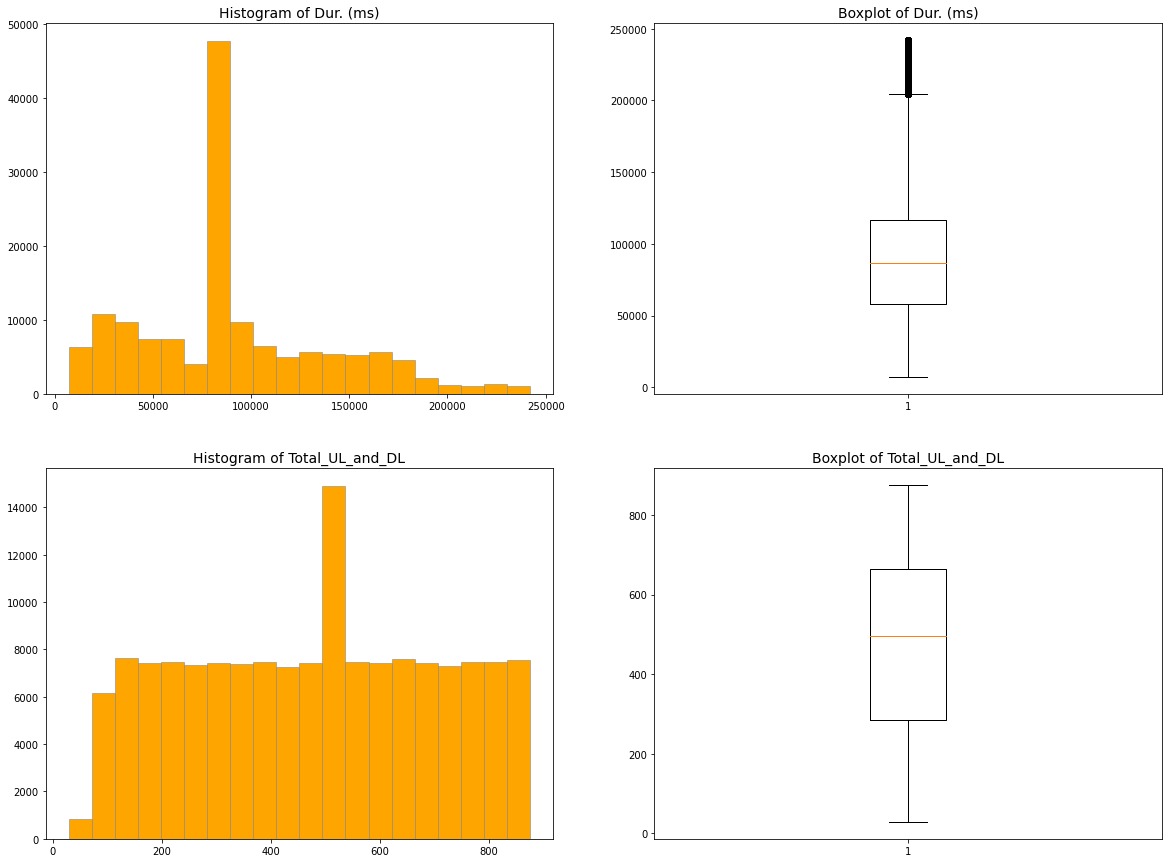

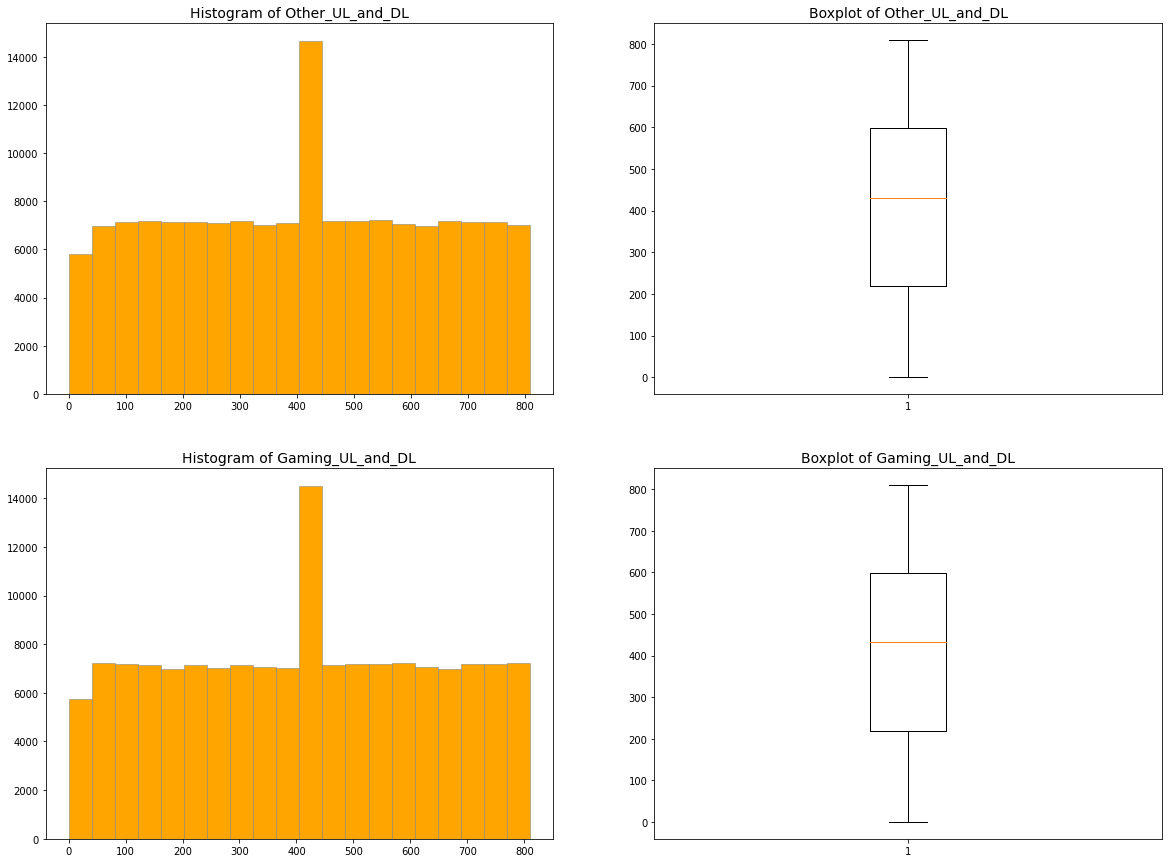

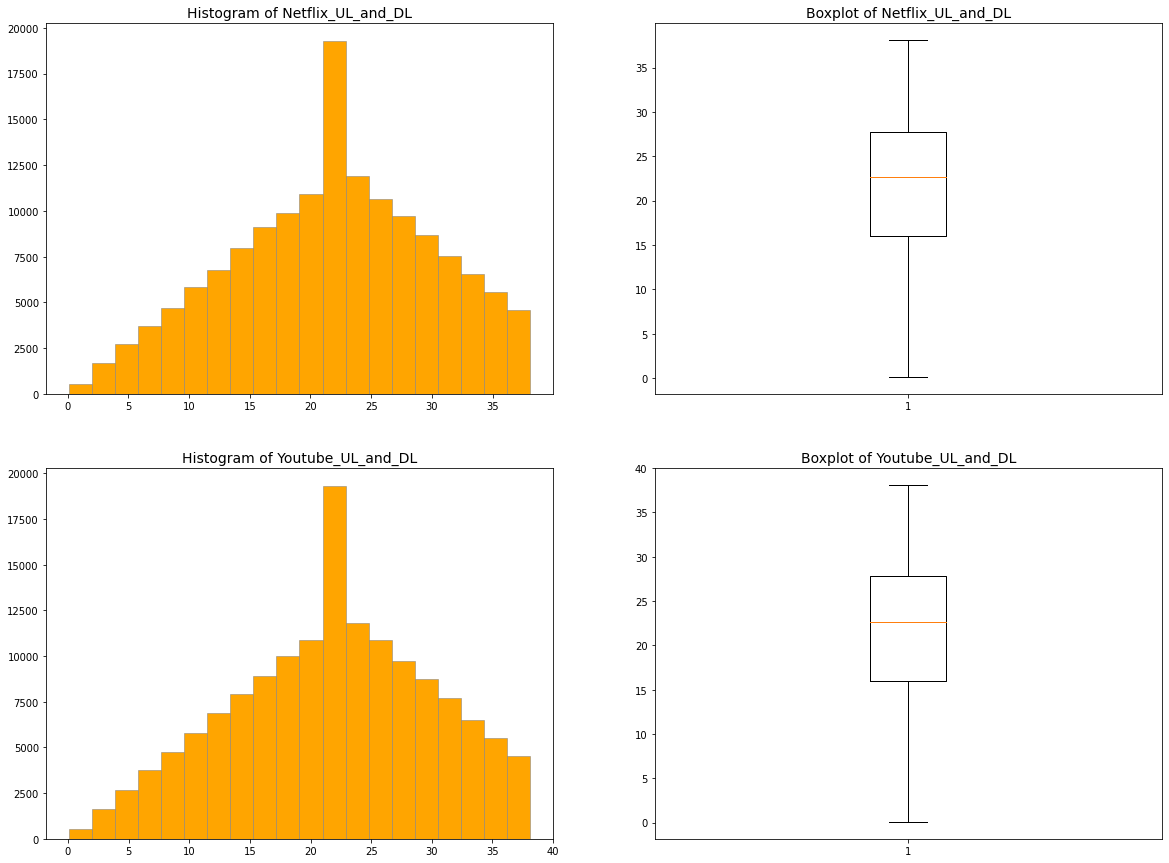

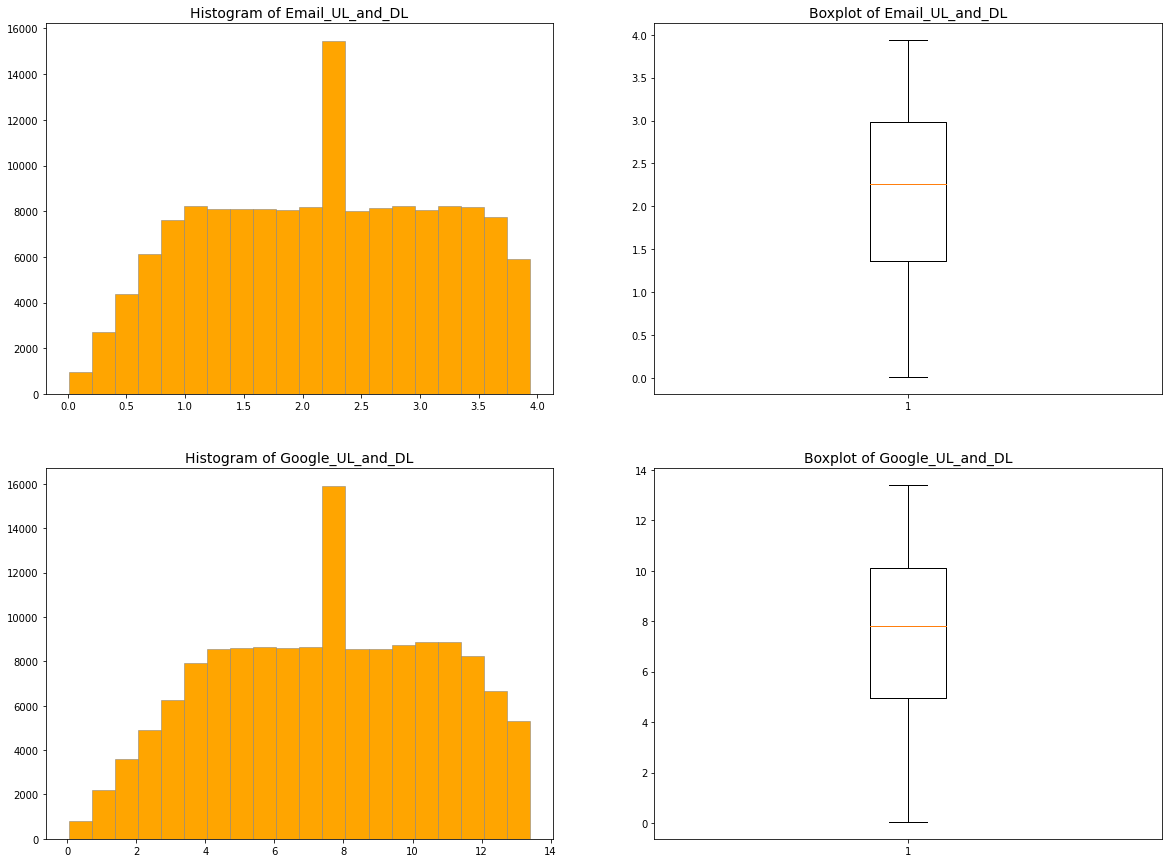

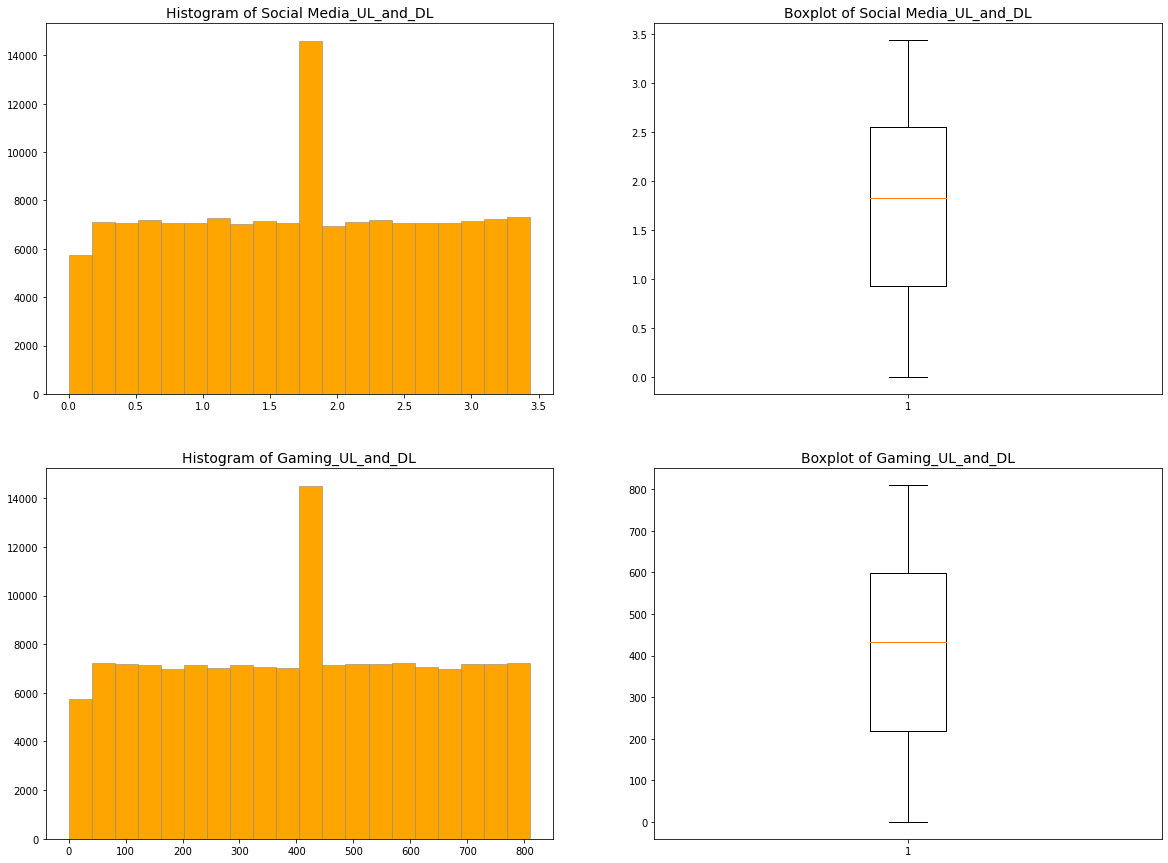

In [42]:
# Graphical univariate analysis plots after fixing outliers

plot.plot_univariate(user_overview_data,'Dur. (ms)','Total_UL_and_DL')
plot.plot_univariate(user_overview_data,'Other_UL_and_DL','Gaming_UL_and_DL')
plot.plot_univariate(user_overview_data,'Netflix_UL_and_DL','Youtube_UL_and_DL')
plot.plot_univariate(user_overview_data,'Email_UL_and_DL','Google_UL_and_DL')
plot.plot_univariate(user_overview_data,'Social Media_UL_and_DL','Gaming_UL_and_DL')

#### Multivariate Analysis

In [43]:
user_overview_data.head(2)

,Bearer Id,Dur. (ms),MSISDN/Number,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
0,13114500000000000000.0,86399.0,33664962239.0,345.6,180.6,292.4,17.9,18.4,3.7,2.9,1.6
1,13114500000000000000.0,86399.0,33681854413.0,707.2,542.0,609.9,35.6,22.7,0.9,4.4,1.9


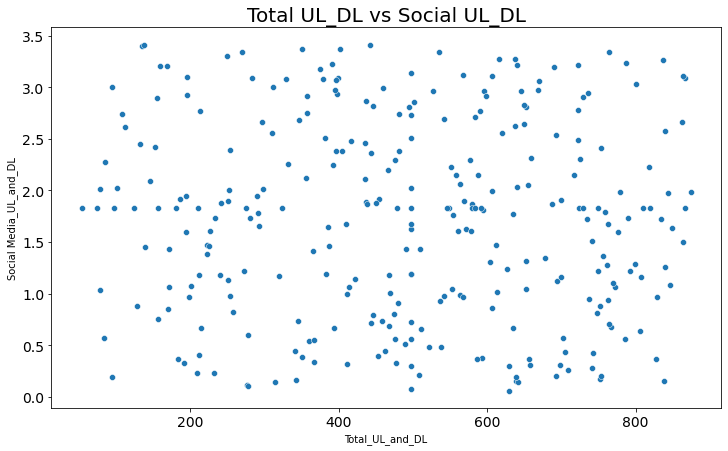

In [44]:
# Plotting a multivariate graph of Social media vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Social Media_UL_and_DL", title="Total UL_DL vs Social UL_DL")

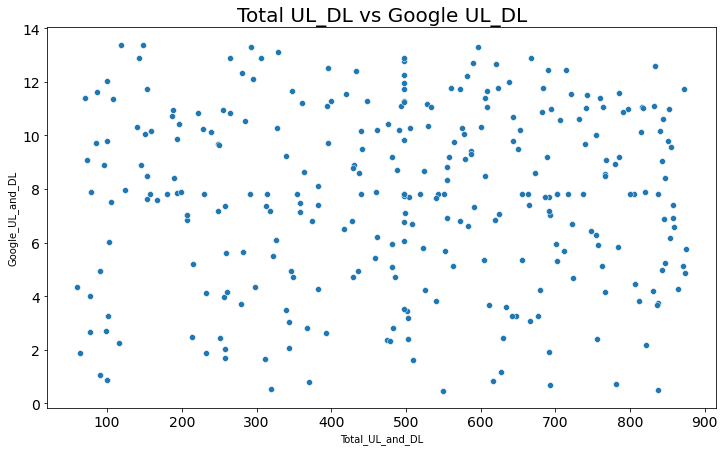

In [45]:
# Plotting a multivariate graph of Google vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Google_UL_and_DL", title="Total UL_DL vs Google UL_DL")

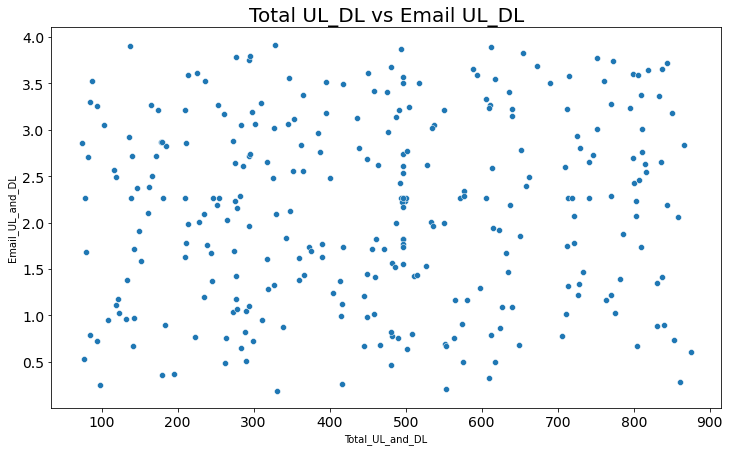

In [46]:
# Plotting a multivariate graph of Email vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Email_UL_and_DL", title="Total UL_DL vs Email UL_DL")

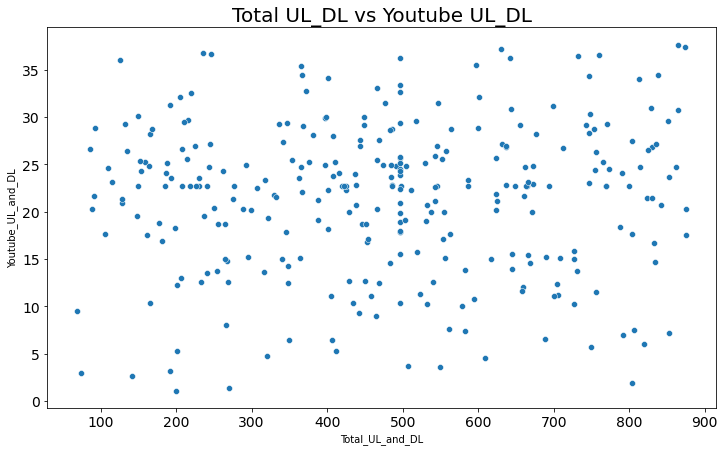

In [47]:
# Plotting a multivariate graph of Youtube vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Youtube_UL_and_DL", title="Total UL_DL vs Youtube UL_DL")

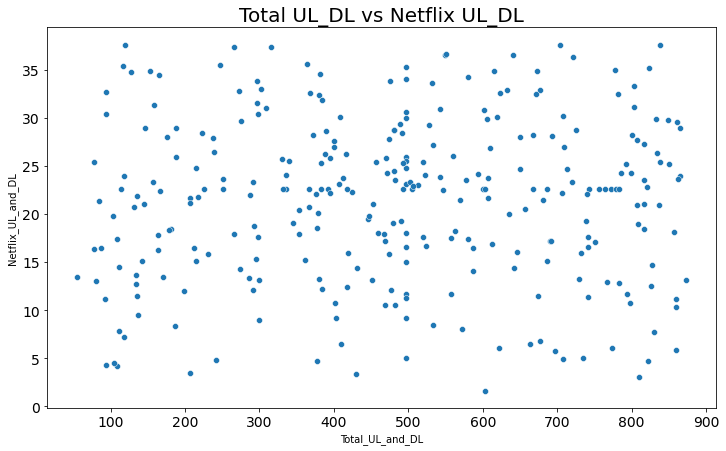

In [48]:
# Plotting a multivariate graph of Netflix vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Netflix_UL_and_DL", title="Total UL_DL vs Netflix UL_DL")

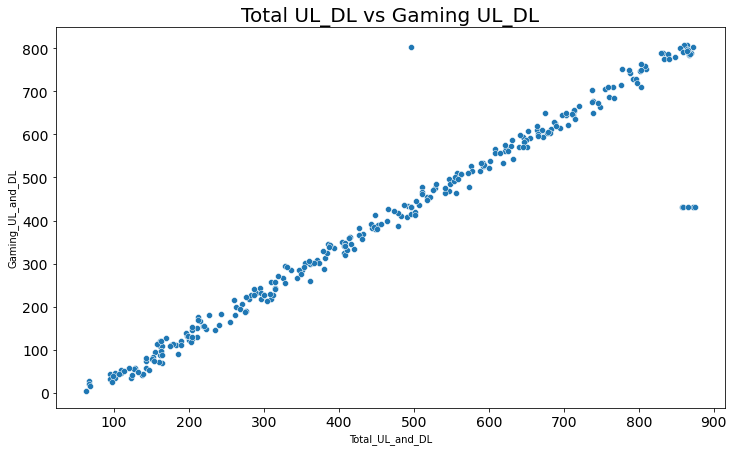

In [49]:
# Plotting a multivariate graph of Gaming vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Gaming_UL_and_DL", title="Total UL_DL vs Gaming UL_DL")

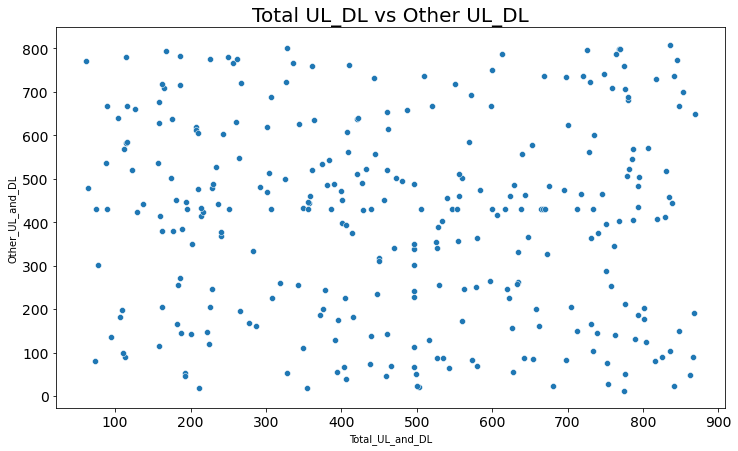

In [50]:
# Plotting a multivariate graph of Other vs total

cplx_plot.plot_scatter(user_overview_data.sample(300), x_col="Total_UL_and_DL", y_col="Other_UL_and_DL", title="Total UL_DL vs Other UL_DL")

In [51]:
# Creating a correlation matrix for the main columns to the analysis

correlated_columns = ['Total_UL_and_DL','Other_UL_and_DL','Gaming_UL_and_DL','Netflix_UL_and_DL','Youtube_UL_and_DL','Email_UL_and_DL','Google_UL_and_DL','Social Media_UL_and_DL']
sample_data_for_correlation = user_overview_data[correlated_columns]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
corr = sample_data_for_correlation.corr()
corr

,Total_UL_and_DL,Other_UL_and_DL,Gaming_UL_and_DL,Netflix_UL_and_DL,Youtube_UL_and_DL,Email_UL_and_DL,Google_UL_and_DL,Social Media_UL_and_DL
Total_UL_and_DL,1.000,-0.001,0.980,0.015,0.014,0.003,0.006,0.003
Other_UL_and_DL,-0.001,1.000,0.000,-0.008,0.005,-0.002,-0.001,0.006
Gaming_UL_and_DL,0.980,0.000,1.000,-0.003,-0.005,0.001,-0.001,-0.000
Netflix_UL_and_DL,0.015,-0.008,-0.003,1.000,0.000,0.001,-0.002,0.002
Youtube_UL_and_DL,0.014,0.005,-0.005,0.000,1.000,-0.003,0.001,0.000
Email_UL_and_DL,0.003,-0.002,0.001,0.001,-0.003,1.000,0.000,0.004
Google_UL_and_DL,0.006,-0.001,-0.001,-0.002,0.001,0.000,1.000,-0.002
Social Media_UL_and_DL,0.003,0.006,-0.000,0.002,0.000,0.004,-0.002,1.000


<AxesSubplot:>

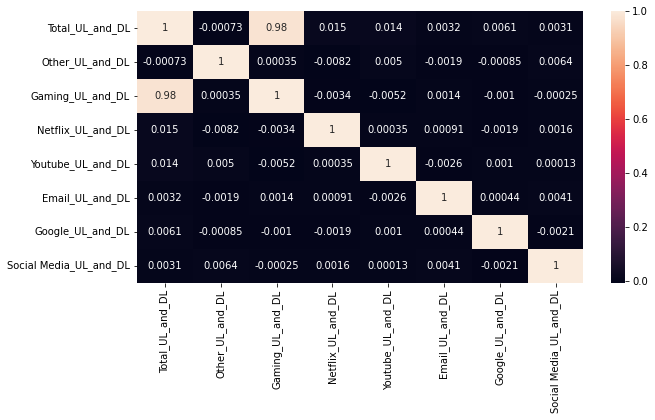

In [52]:
# Creating a correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot = True)

In [53]:
# Create a clean user overview csv file

user_overview_data.to_csv('../data/user_overview_data.csv',index=False)